<a href="https://colab.research.google.com/github/Carmen-88/CSC587_CSchuler/blob/main/Project_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

#read your csv to a dataframe
df = pd.read_csv('/content/drive/MyDrive/Personal/Grad Program/CSC 587 - Adv Data Mining/Project/Curated Log Data BL#2.csv')

In [3]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import model_selection
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#for any NA values, enter median
for col in df.columns:
  if df[col].isna().any():
    df = df.fillna(df[col].median())
df.head()

,PPMI_COHORT,35,50,55,62,71,93,98,111,112,...,999925983,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119
0,Control,0.731768,-0.798850,-1.137471,0.383820,0.587303,0.223999,-0.180993,0.188229,0.281230,...,0.514556,0.075265,0.000000,-0.333566,-0.111533,0.034530,-0.088870,0.197221,0.103648,-0.719921
1,PD,0.292937,0.260915,0.099700,1.410015,0.028393,0.600868,0.263158,0.091365,1.396008,...,0.033282,-1.407253,0.045656,-0.531562,-0.168789,0.221036,0.058911,0.113740,0.151346,-0.587543
2,Control,0.246383,0.314824,0.325111,0.935141,-0.569361,0.375527,0.107619,0.339758,0.588795,...,-0.013386,0.226228,-2.025472,-0.454397,0.085085,-0.010333,-0.319140,-1.534212,-1.289569,0.073647
3,Control,-0.459301,-0.280314,0.542046,-0.728370,-0.339891,0.123959,-0.387232,0.316777,0.324062,...,-0.288898,-1.407253,-2.025472,-0.602134,0.019927,0.000000,-0.143942,-2.054922,1.508014,0.346150
4,PD,0.757960,-0.409671,0.124044,1.830303,1.531307,-0.643919,-0.699620,-0.819987,0.359760,...,5.792419,0.585375,-2.025472,-0.778444,-1.150457,-0.774700,-0.909086,-0.858797,-1.095774,0.193999


In [5]:
#Create dummy variable for cohort to convert PD to 0 and Control to 1
dummy = pd.get_dummies(df['PPMI_COHORT'], dtype=int)
df = pd.concat([df, dummy], axis = 1)
df = df.rename(index=str, columns = {"Control": "Parkinsons"})
df = df.drop('PD', axis=1)
df.head()

,PPMI_COHORT,35,50,55,62,71,93,98,111,112,...,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119,Parkinsons
0,Control,0.731768,-0.798850,-1.137471,0.383820,0.587303,0.223999,-0.180993,0.188229,0.281230,...,0.075265,0.000000,-0.333566,-0.111533,0.034530,-0.088870,0.197221,0.103648,-0.719921,1
1,PD,0.292937,0.260915,0.099700,1.410015,0.028393,0.600868,0.263158,0.091365,1.396008,...,-1.407253,0.045656,-0.531562,-0.168789,0.221036,0.058911,0.113740,0.151346,-0.587543,0
2,Control,0.246383,0.314824,0.325111,0.935141,-0.569361,0.375527,0.107619,0.339758,0.588795,...,0.226228,-2.025472,-0.454397,0.085085,-0.010333,-0.319140,-1.534212,-1.289569,0.073647,1
3,Control,-0.459301,-0.280314,0.542046,-0.728370,-0.339891,0.123959,-0.387232,0.316777,0.324062,...,-1.407253,-2.025472,-0.602134,0.019927,0.000000,-0.143942,-2.054922,1.508014,0.346150,1
4,PD,0.757960,-0.409671,0.124044,1.830303,1.531307,-0.643919,-0.699620,-0.819987,0.359760,...,0.585375,-2.025472,-0.778444,-1.150457,-0.774700,-0.909086,-0.858797,-1.095774,0.193999,0


In [6]:
#Take out the PPMI_COHORT column since we now have Parkinsons column
df = df.drop('PPMI_COHORT', axis=1)
df.head()

,35,50,55,62,71,93,98,111,112,117,...,999926058,999926062,999926097,999926106,999926107,999926108,999926109,999926111,999926119,Parkinsons
0,0.731768,-0.798850,-1.137471,0.383820,0.587303,0.223999,-0.180993,0.188229,0.281230,0.366934,...,0.075265,0.000000,-0.333566,-0.111533,0.034530,-0.088870,0.197221,0.103648,-0.719921,1
1,0.292937,0.260915,0.099700,1.410015,0.028393,0.600868,0.263158,0.091365,1.396008,0.294992,...,-1.407253,0.045656,-0.531562,-0.168789,0.221036,0.058911,0.113740,0.151346,-0.587543,0
2,0.246383,0.314824,0.325111,0.935141,-0.569361,0.375527,0.107619,0.339758,0.588795,0.176520,...,0.226228,-2.025472,-0.454397,0.085085,-0.010333,-0.319140,-1.534212,-1.289569,0.073647,1
3,-0.459301,-0.280314,0.542046,-0.728370,-0.339891,0.123959,-0.387232,0.316777,0.324062,-0.188303,...,-1.407253,-2.025472,-0.602134,0.019927,0.000000,-0.143942,-2.054922,1.508014,0.346150,1
4,0.757960,-0.409671,0.124044,1.830303,1.531307,-0.643919,-0.699620,-0.819987,0.359760,6.493142,...,0.585375,-2.025472,-0.778444,-1.150457,-0.774700,-0.909086,-0.858797,-1.095774,0.193999,0


In [7]:
#Independent and Dependent Variables
X = df.drop('Parkinsons', axis=1)
y = df['Parkinsons']

In [8]:
#Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 56
Testing set size: 14


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
svc = SVC(probability=True)
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
print(accuracy_score(y_test, Y_pred))

0.7857142857142857


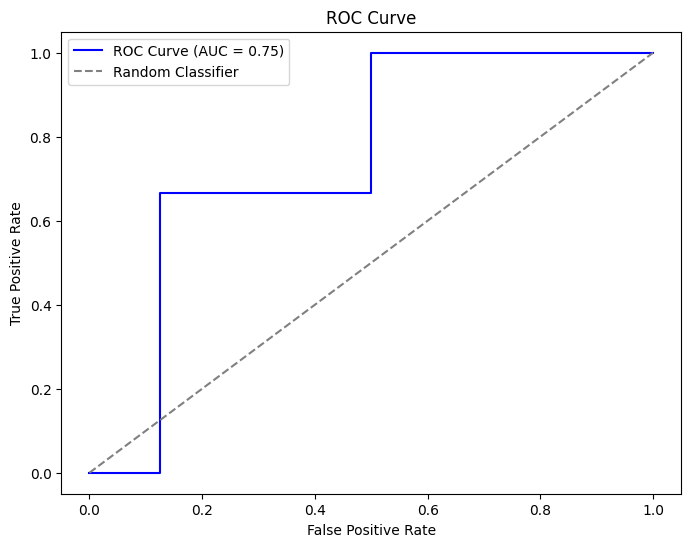

[[0.54955955 0.45044045]
 [0.68980464 0.31019536]
 [0.50668009 0.49331991]
 [0.51839757 0.48160243]
 [0.41782076 0.58217924]
 [0.53941022 0.46058978]
 [0.37438002 0.62561998]
 [0.51635505 0.48364495]
 [0.40872082 0.59127918]
 [0.38914823 0.61085177]
 [0.49267279 0.50732721]
 [0.3809618  0.6190382 ]
 [0.55621201 0.44378799]
 [0.4816379  0.5183621 ]]


In [15]:
# Fit model and get probabilities
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

svc.fit(X_train, y_train)
y_scores = svc.predict_proba(X_test)[:, 1]#we're only interested in the probabilities for the positive class. Therefore, skip column 0

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(svc.predict_proba(X_test))

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.57      0.67      0.62         6

    accuracy                           0.64        14
   macro avg       0.64      0.65      0.64        14
weighted avg       0.65      0.64      0.64        14



In [17]:
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[7 1]
 [2 4]]


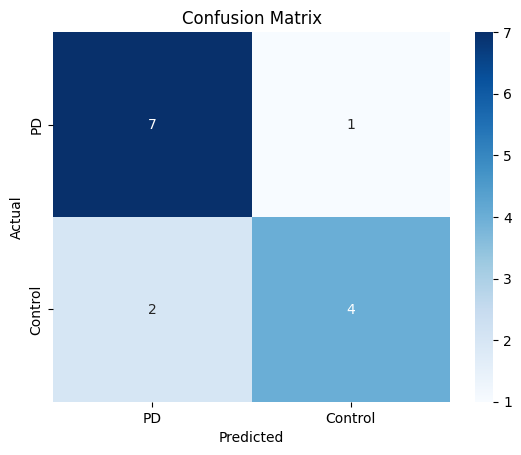

In [19]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['PD', 'Control'],
            yticklabels=['PD', 'Control'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
filename = 'svc.joblib'
joblib.dump(svc, filename)

['svc.joblib']

In [37]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.7857142857142857


In [38]:
from joblib import dump, load
dump(svc, 'svc.joblib')

['svc.joblib']

In [39]:
import pandas as pd
test_data = pd.read_csv('/content/drive/MyDrive/Personal/Grad Program/CSC 587 - Adv Data Mining/Project/Curated Log Data BL#2.csv')

In [43]:
dummy = pd.get_dummies(test_data['PPMI_COHORT'], dtype=int)  # Assuming 'PPMI_COHORT' is the categorical column
test_data = pd.concat([test_data, dummy], axis=1)
test_data = test_data.rename(index=str, columns={"Control": "Parkinsons"})
test_data = test_data.drop('PD', axis=1)
test_data = test_data.drop('PPMI_COHORT', axis=1)  # Remove the original categorical column

In [44]:
test_data_features = test_data.drop('Parkinsons', axis=1)
test_data_features = scaler.transform(test_data_features)

In [46]:
predictions = loaded_model.predict(test_data_features)

In [49]:
cm = confusion_matrix(test_data['Parkinsons'], predictions)
print(cm)

[[37  1]
 [ 3 29]]


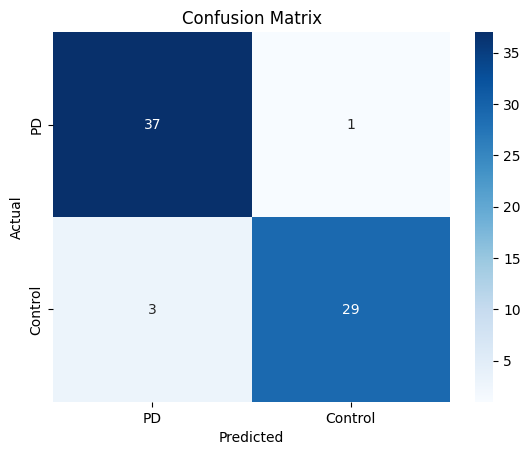

In [50]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['PD', 'Control'],
            yticklabels=['PD', 'Control'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

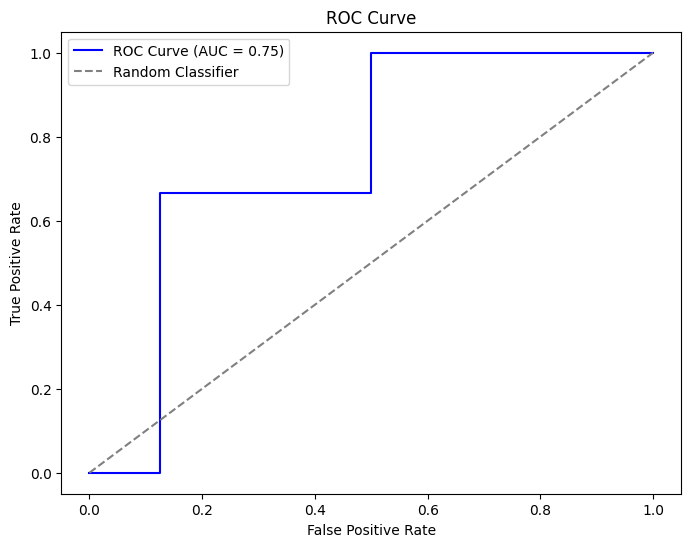

[[0.76400958 0.31795998 0.01156842 ... 0.64451289 0.47892612 0.23757517]
 [0.48642517 0.73127311 0.26317782 ... 0.62062265 0.48710351 0.28098957]
 [0.4569774  0.75229769 0.30902075 ... 0.14901571 0.24007423 0.49783197]
 ...
 [0.39071499 0.54203018 0.29994498 ... 0.72455297 0.58618312 0.27567674]
 [0.3705343  0.63205169 0.3553227  ... 0.36268885 0.26478214 0.54868803]
 [0.20088883 0.6220586  0.11083925 ... 0.3777021  0.37581977 0.48501609]]


In [55]:
# Fit model and get probabilities
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

print(test_data_features)
